In [1]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from collections import Counter

In [7]:
from transformers import BertForSequenceClassification

mbert_model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=4)
mbert_model.load_state_dict(torch.load("mbert2_model.pth", map_location=torch.device('cpu')))

mbert_model.eval()

print("mBERT model loaded successfully!")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\MIST LAB\AppData\Local\Temp\ipykernel_6648\485036559.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `

mBERT model loaded successfully!


In [6]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

distilbert_model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-multilingual-cased", num_labels=4)
distilbert_model.load_state_dict(torch.load("distilbert1_model.pth", map_location=torch.device('cpu')))

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-multilingual-cased")
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-multilingual-cased",
    num_labels=4  # Change based on your task
)
distilbert_model.eval()

print("dBERT model loaded successfully!")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\MIST LAB\AppData\Local\Temp\ipykernel_6648\2599258224.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mo

dBERT model loaded successfully!


In [8]:
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
xlmr_model = XLMRobertaForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels=4)
xlmr_model.load_state_dict(torch.load("xlmr1_model.pth", map_location=torch.device('cpu')))

xlmr_model.eval()

print("xlmr model loaded successfully!")

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\MIST LAB\AppData\Local\Temp\ipykernel_6648\1113333207.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via thi

xlmr model loaded successfully!


In [10]:
from transformers import BertTokenizer

# Load the same tokenizer used during training
mbert_tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-uncased")
distilbert_tokenizer =  DistilBertTokenizer.from_pretrained("distilbert-base-multilingual-cased")
xlmr_tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')



print("Tokenizer loaded successfully!")


Tokenizer loaded successfully!


In [11]:
class CyberbullyingDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item


In [16]:
mbert_test_dataset = torch.load("mbert1_test_dataset2.pth")
distilbert_test_dataset = torch.load("distilbert1_test_dataset.pth")
xlmr_test_dataset = torch.load("xlmr1_test_dataset.pth")

test_labels = torch.load("multi_test_labels.pth")

C:\Users\MIST LAB\AppData\Local\Temp\ipykernel_6648\606101165.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mbert_test_dataset = torch.load("mbert1_test_dataset2.pth")

In [23]:

from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from tqdm import tqdm


In [24]:
def evaluate_model(model, test_dataset, batch_size=16):
    model.eval()  # Set model to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    all_preds = []
    all_labels = []
    
    with torch.no_grad():  # Disable gradient computation for inference
        for batch in tqdm(test_loader, desc="Evaluating"):
            # Move inputs to device (CPU/GPU)
            inputs = {key: val.to(device) for key, val in batch.items() if key != "labels"}
            labels = batch["labels"].to(device)
            
            outputs = model(**inputs)
            logits = outputs.logits  # Get raw scores
            preds = torch.argmax(logits, dim=1)  # Get class with highest probability
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy


In [10]:
# # Example input text
# text = "i hate you!"

# # Tokenize the input
# inputs = roberta_tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

# # Perform inference
# with torch.no_grad():
#     outputs = roberta_model(**inputs)

# # Get predicted class
# predicted_class = torch.argmax(outputs.logits, dim=1).item()
# print(f"Predicted Class: {predicted_class}")


In [19]:
mbert_accuracy = evaluate_model(mbert_model, mbert_test_dataset)
distilbert_accuracy = evaluate_model(distilbert_model, distilbert_test_dataset)
xlmr_accuracy = evaluate_model(xlmr_model, xlmr_test_dataset)

print(f"mBERT Model Accuracy: {mbert_accuracy:.4f}")
print(f"distilBERT Model Accuracy: {distilbert_accuracy:.4f}")
print(f"XLM-R Model Accuracy: {xlmr_accuracy:.4f}")

Evaluating:   0%|                                                                              | 0/658 [00:00<?, ?it/s]C:\Users\MIST LAB\AppData\Local\Temp\ipykernel_6648\2646260844.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Evaluating:   0%|                                                                              | 0/658 [00:00<?, ?it/s]C:\Users\MIST LAB\AppData\Local\Temp\ipykernel_6648\2646260844.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Evaluating:   0%|                                                         

mBERT Model Accuracy: 0.8573
distilBERT Model Accuracy: 0.8536
XLM-R Model Accuracy: 0.8568


In [12]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU instead.")

GPU is available and being used: NVIDIA GeForce RTX 3070


In [20]:
from torch.utils.data import DataLoader
from collections import Counter
import torch.nn.functional as F
import torch

# Define the ensemble prediction function
def ensemble_predict(mbert_model, distilbert_model, xlmr_model, mbert_dataset, distilbert_dataset, xlmr_dataset, batch_size=16):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    mbert_model.to(device)
    distilbert_model.to(device)
    xlmr_model.to(device)

    mbert_loader = DataLoader(mbert_dataset, batch_size=batch_size, shuffle=False)
    distilbert_loader = DataLoader(distilbert_dataset, batch_size=batch_size, shuffle=False)
    xlmr_loader = DataLoader(xlmr_dataset, batch_size=batch_size, shuffle=False)

    all_preds_hard = []
    all_preds_soft = []

    for (mbert_batch, distilbert_batch, xlmr_batch) in zip(mbert_loader, distilbert_loader, xlmr_loader):
        mbert_inputs = {key: val.to(device) for key, val in mbert_batch.items() if key != "labels"}
        distilbert_inputs = {key: val.to(device) for key, val in distilbert_batch.items() if key != "labels"}
        xlmr_inputs = {key: val.to(device) for key, val in xlmr_batch.items() if key != "labels"}

        with torch.no_grad():
            mbert_outputs = mbert_model(**mbert_inputs).logits
            distilbert_outputs = distilbert_model(**distilbert_inputs).logits
            xlmr_outputs = xlmr_model(**xlmr_inputs).logits
            
            mbert_probs = F.softmax(mbert_outputs, dim=1)
            distilbert_probs = F.softmax(distilbert_outputs, dim=1)
            xlmr_probs = F.softmax(xlmr_outputs, dim=1)
            
            avg_probs = (mbert_probs + distilbert_probs + xlmr_probs) / 3
            final_preds_soft = torch.argmax(avg_probs, dim=1).cpu().numpy()
            
            mbert_preds = torch.argmax(mbert_probs, dim=1).cpu().numpy()
            distilabert_preds = torch.argmax(distilbert_probs, dim=1).cpu().numpy()
            xlmr_preds = torch.argmax(xlmr_probs, dim=1).cpu().numpy()
            
            final_preds_hard = [Counter([m, b, x]).most_common(1)[0][0] for m, b, x in zip(mbert_preds, distilbert_preds, xlmr_preds)]

            all_preds_soft.extend(final_preds_soft)
            all_preds_hard.extend(final_preds_hard)

    return all_preds_hard, all_preds_soft


In [14]:
# # Run ensemble prediction
# hard_preds, soft_preds = ensemble_predict(bert_model, roberta_model, bert_test_dataset, roberta_test_dataset, albert_model, albert_test_dataset, gpt2_model, gpt2_test_dataset, xlnet_model, xlnet_test_dataset)

In [15]:
# # Print first 10 predictions from both methods
# print("Majority Voting Predictions:", hard_preds[:10])
# print("Softmax Averaging Predictions:", soft_preds[:10])

In [ ]:
# from sklearn.metrics import accuracy_score

# # Load the actual test labels
# test_labels = torch.load("bangla_test_labels.pth")  # Ensure this file contains the correct test labels

# # Run the ensemble prediction function
# # hard_preds, soft_preds = ensemble_predict(mbert_model, banglabert_model, mbert_test_dataset, banglabert_test_dataset, xlmr_model, xlmr_test_dataset)

# # Compute accuracy
# hard_voting_accuracy = accuracy_score(test_labels, hard_preds)
# softmax_avg_accuracy = accuracy_score(test_labels, soft_preds)

# print(f"Ensemble (Majority Voting) Accuracy: {hard_voting_accuracy:.4f}")
# print(f"Ensemble (Softmax Averaging) Accuracy: {softmax_avg_accuracy:.4f}")


In [25]:
def weighted_ensemble_predict(mbert_model, distilbert_model, xlmr_model, 
                               mbert_dataset, distilbert_dataset, xlmr_dataset, 
                               batch_size=16):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    mbert_model.to(device)
    distilbert_model.to(device)
    xlmr_model.to(device)

    weights = {
        "mbert": 0.8536,       
        "distilbert": 0.8573,  
        "xlmr": 0.8568         
    }

    # Create DataLoader for each dataset
    mbert_loader = DataLoader(mbert_dataset, batch_size=batch_size, shuffle=False)
    distilbert_loader = DataLoader(distilbert_dataset, batch_size=batch_size, shuffle=False)
    xlmr_loader = DataLoader(xlmr_dataset, batch_size=batch_size, shuffle=False)

    all_preds_hard = []
    all_preds_soft = []

    for (mbert_batch, distilbert_batch, xlmr_batch) in zip(mbert_loader, distilbert_loader, xlmr_loader):
        
        mbert_inputs = {key: val.to(device) for key, val in mbert_batch.items() if key != "labels"}
        distilbert_inputs = {key: val.to(device) for key, val in distilbert_batch.items() if key != "labels"}
        xlmr_inputs = {key: val.to(device) for key, val in xlmr_batch.items() if key != "labels"}

        with torch.no_grad():
            mbert_outputs = mbert_model(**mbert_inputs).logits
            distilbert_outputs = distilbert_model(**distilbert_inputs).logits
            xlmr_outputs = xlmr_model(**xlmr_inputs).logits

            mbert_probs = F.softmax(mbert_outputs, dim=1)
            distilbert_probs = F.softmax(distilbert_outputs, dim=1)
            xlmr_probs = F.softmax(xlmr_outputs, dim=1)

            avg_probs = (
                weights["mbert"] * mbert_probs +
                weights["distilbert"] * distilbert_probs +
                weights["xlmr"] * xlmr_probs
            ) / sum(weights.values())

            final_preds_soft = torch.argmax(avg_probs, dim=1).cpu().numpy()

            mbert_preds = torch.argmax(mbert_probs, dim=1).cpu().numpy()
            distilbert_preds = torch.argmax(distilbert_probs, dim=1).cpu().numpy()
            xlmr_preds = torch.argmax(xlmr_probs, dim=1).cpu().numpy()

            final_preds_hard = [
                Counter([m, d, x]).most_common(1)[0][0]
                for m, d, x in zip(mbert_preds, distilbert_preds, xlmr_preds)
            ]

            all_preds_soft.extend(final_preds_soft)
            all_preds_hard.extend(final_preds_hard)

    return all_preds_hard, all_preds_soft


In [27]:
# Assuming your models (mBERT, distilBERT, XLM-R) and datasets are already defined and loaded

# Example test labels (replace with actual labels)
y_true = test_labels  # Replace with your actual test labels

# Call the weighted ensemble prediction function
hard_preds, soft_preds = weighted_ensemble_predict(
    mbert_model, distilbert_model, xlmr_model,
    mbert_test_dataset, distilbert_test_dataset, xlmr_test_dataset,
    batch_size=16
)

# Now evaluate the performance of the ensemble
accuracy = accuracy_score(y_true, hard_preds)
print(f"Ensemble Hard Voting Accuracy: {accuracy:.4f}")

from sklearn.metrics import precision_recall_fscore_support

# Precision, Recall, F1 Score (Weighted)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, hard_preds, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


C:\Users\MIST LAB\AppData\Local\Temp\ipykernel_6648\2646260844.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Ensemble Hard Voting Accuracy: 0.8643
Precision: 0.8641
Recall: 0.8643
F1 Score: 0.8642


In [28]:
accuracy_soft = accuracy_score(y_true, soft_preds)
print(f"Ensemble Soft Voting Accuracy: {accuracy_soft:.4f}")

precision_soft, recall_soft, f1_soft, _ = precision_recall_fscore_support(y_true, soft_preds, average='weighted')
print(f"Precision (Soft Voting): {precision_soft:.4f}")
print(f"Recall (Soft Voting): {recall_soft:.4f}")
print(f"F1 Score (Soft Voting): {f1_soft:.4f}")

Ensemble Soft Voting Accuracy: 0.8668
Precision (Soft Voting): 0.8668
Recall (Soft Voting): 0.8668
F1 Score (Soft Voting): 0.8667


Confusion Matrix (Soft Voting):
[[2180   74  340   81]
 [  65 2537   51   48]
 [ 413   48 2193   97]
 [  83   37   64 2208]]


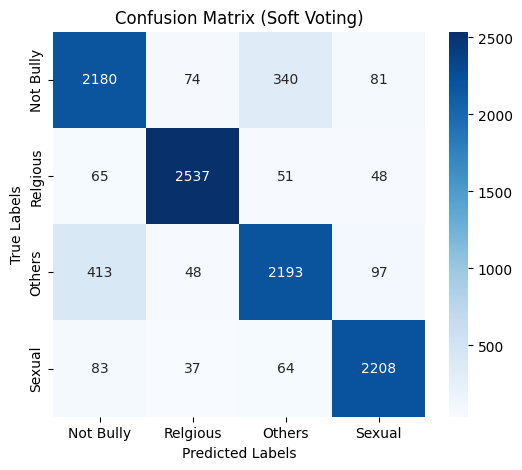

In [29]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix for soft voting predictions
conf_matrix = confusion_matrix(y_true, soft_preds)

# Print confusion matrix
print("Confusion Matrix (Soft Voting):")
print(conf_matrix)

# Optionally, you can use seaborn or matplotlib for a visual representation:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Bully', 'Relgious', 'Others', 'Sexual'], yticklabels=['Not Bully', 'Relgious', 'Others', 'Sexual'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Soft Voting)')
plt.show()

In [30]:
# import pandas as pd
# from transformers import BertTokenizer

# tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-uncased")

# # Label mapping
# label_map = {
#     0: "Not Bully",
#     1: "Religious",
#     2: "Others",
#     3: "Sexual"
# }

# comments = []
# for example in mbert_test_dataset:
#     input_ids = example['input_ids']
#     input_ids = input_ids[:example['attention_mask'].sum()]
#     decoded = tokenizer.decode(input_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)
#     comments.append(decoded)

# # Build full DataFrame
# df = pd.DataFrame({
#     "Comment": comments,
#     "True Label": [label_map[label] for label in y_true],
#     "Predicted Label": [label_map[pred] for pred in soft_preds],
#     "Correct": [yt == yp for yt, yp in zip(y_true, soft_preds)]
# })

# df_wrong = df[df["Correct"] == False]

# df_wrong.to_csv("soft_voting_misclassified_only.csv", index=False)
# print("Saved as soft_voting_misclassified_only.csv ✅")


In [31]:
import pandas as pd
from sklearn.metrics import classification_report

# Convert labels back to numeric for sklearn
true_numeric = y_true
pred_numeric = soft_preds

# Class names (make sure this matches your label_map)
target_names = ["Not Bully", "Religious", "Others", "Sexual"]

# Generate class-wise metrics
report = classification_report(true_numeric, pred_numeric, target_names=target_names, output_dict=True)

# Convert to DataFrame for easy viewing
report_df = pd.DataFrame(report).transpose()

# Round values for neatness
report_df = report_df.round(3)

# Save to CSV (optional)
report_df.to_csv("class_wise_report.csv")

# Display
report_df


,precision,recall,f1-score,support
Not Bully,0.795,0.815,0.805,2675.000
Religious,0.941,0.939,0.940,2701.000
Others,0.828,0.797,0.812,2751.000
Sexual,0.907,0.923,0.915,2392.000
accuracy,0.867,0.867,0.867,0.867
macro avg,0.868,0.869,0.868,10519.000
weighted avg,0.867,0.867,0.867,10519.000


C:\Users\MIST LAB\AppData\Local\Temp\ipykernel_6648\2646260844.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Ensemble ROC-AUC Score (macro): 0.9765


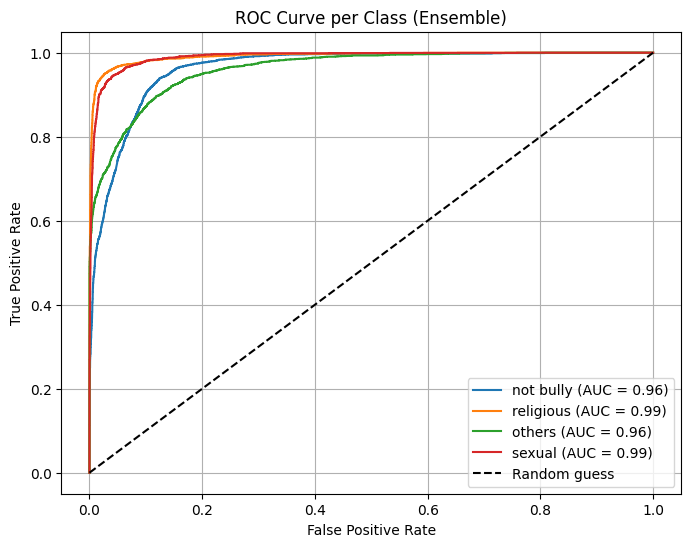

Matthews Correlation Coefficient (MCC): 0.8224
Cohen's Kappa Score: 0.8223


In [32]:
import torch
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, matthews_corrcoef, cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assume these are loaded from your notebook environment
# mbert_model, distilbert_model, xlmr_model
# mbert_test_dataset, distilbert_test_dataset, xlmr_test_dataset
# test_labels

device = torch.device('cpu')

models = {
    'mBERT': mbert_model,
    'DistilBERT': distilbert_model,
    'XLM-R': xlmr_model,
}

datasets = {
    'mBERT': mbert_test_dataset,
    'DistilBERT': distilbert_test_dataset,
    'XLM-R': xlmr_test_dataset,
}

def get_predictions(model, dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)
    model.to(device)
    model.eval()
    all_probs = []
    all_preds = []
    with torch.no_grad():
        for batch in loader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            outputs = model(**inputs)
            logits = outputs.logits
            probs = torch.softmax(logits, dim=1)
            preds = torch.argmax(probs, dim=1)
            all_probs.append(probs.cpu().numpy())
            all_preds.append(preds.cpu().numpy())
    all_probs = np.concatenate(all_probs)
    all_preds = np.concatenate(all_preds)
    return all_probs, all_preds

# Get predictions and probabilities for each model
model_probs = []
model_preds = []

for name in models:
    probs, preds = get_predictions(models[name], datasets[name])
    model_probs.append(probs)
    model_preds.append(preds)

# Ensemble by averaging probabilities
ensemble_probs = np.mean(model_probs, axis=0)
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# True labels as numpy array
true_labels = test_labels.cpu().numpy() if torch.is_tensor(test_labels) else np.array(test_labels)

# Binarize true labels for multiclass ROC-AUC
n_classes = 4
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))

# Calculate ROC-AUC score (macro average)
roc_auc = roc_auc_score(true_labels_bin, ensemble_probs, average='macro', multi_class='ovr')
print(f'Ensemble ROC-AUC Score (macro): {roc_auc:.4f}')

# Plot ROC curve for each class
class_names = ['not bully', 'religious', 'others', 'sexual']

plt.figure(figsize=(8, 6))
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], ensemble_probs[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.title('ROC Curve per Class (Ensemble)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("ensemble_multilingual_roc_curve.png", dpi=300)
plt.show()

# Calculate MCC and Cohen's Kappa on ensemble predictions
mcc = matthews_corrcoef(true_labels, ensemble_preds)
kappa = cohen_kappa_score(true_labels, ensemble_preds)

print(f'Matthews Correlation Coefficient (MCC): {mcc:.4f}')
print(f"Cohen's Kappa Score: {kappa:.4f}")


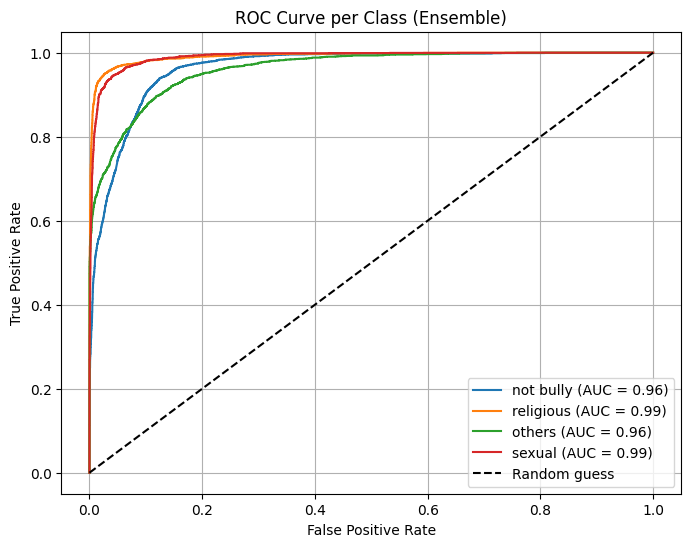

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Example inputs (you should already have these)
# true_labels = numpy array of true class indices
# ensemble_probs = numpy array of predicted probabilities from ensemble model

# Set number of classes and class names
n_classes = 4
class_names = ['not bully', 'religious', 'others', 'sexual']

# Binarize the true labels for multi-class ROC
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], ensemble_probs[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.title('ROC Curve per Class (Ensemble)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("ensemble_bangla_roc_curve.png", dpi=300)
plt.show()


In [34]:
from sklearn.metrics import roc_auc_score, cohen_kappa_score, matthews_corrcoef
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize true labels
n_classes = 4
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))

# ROC-AUC Score (macro average for multiclass)
roc_auc = roc_auc_score(true_labels_bin, ensemble_probs, average='macro', multi_class='ovr')
print(f'Ensemble ROC-AUC Score (macro): {roc_auc:.4f}')

# Cohen’s Kappa Score
kappa = cohen_kappa_score(true_labels, ensemble_preds)
print(f"Cohen's Kappa Score: {kappa:.4f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(true_labels, ensemble_preds)
print(f'Matthews Correlation Coefficient (MCC): {mcc:.4f}')


Ensemble ROC-AUC Score (macro): 0.9765
Cohen's Kappa Score: 0.8223
Matthews Correlation Coefficient (MCC): 0.8224
